# In this notebook, I'd provide of a data analisis of the monthly sales cars in Mexico


The next data was provided by INEGI

In [1]:
#Data Manipulation
import pandas as pd
import numpy as np
# Start Python Imports
import math, time, random, datetime
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# Machine learning
import scipy.stats as st
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# Loading Data

The next is the data for cars and the countries of origin!

In [2]:
countries = pd.read_csv('pais_origen.csv')
countries 

,ID_PAIS_ORIGEN,DESC_PAIS_ORIGEN
0,1,México
1,2,Afganistán
2,3,Albania
3,4,Alemania
4,5,Andorra
...,...,...
246,995,No Especificado (Unión Europea)
247,996,No Especificado (Resto de Europa)
248,997,No Especificado (África)
249,998,No Especificado (Oceanía)


In [3]:
car_data = pd.read_excel("venta_mensual.xlsx")
car_data

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID_PAIS_ORIGEN,UNI_VEH
0,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Acura,ILX,Automóviles,De Lujo,IMPORTADO,66,6
1,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,40,19
2,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,66,78
3,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Acura,TLX,Automóviles,De Lujo,IMPORTADO,66,7
4,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Alfa Romeo,Alfa Romeo Giulietta Progression Manual,Automóviles,Deportivos,IMPORTADO,124,6
...,...,...,...,...,...,...,...,...,...,...,...
5542,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volkswagen,Volkswagen Caddy,Camiones ligeros,Pick Ups,IMPORTADO,177,297
5543,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volvo,S60 III,Automóviles,De Lujo,IMPORTADO,66,38
5544,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volvo,XC40,Automóviles,De Lujo,IMPORTADO,23,197
5545,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volvo,XC60 II,Camiones ligeros,SUV's,IMPORTADO,209,59


In [4]:
car_data_new = car_data.merge(countries)
car_data_new.head(20)

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID_PAIS_ORIGEN,UNI_VEH,DESC_PAIS_ORIGEN
0,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Acura,ILX,Automóviles,De Lujo,IMPORTADO,66,6,Estados Unidos
1,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,66,78,Estados Unidos
2,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Acura,TLX,Automóviles,De Lujo,IMPORTADO,66,7,Estados Unidos
3,Registro Administrativo de la Industria Automo...,Nacional,2020,1,BMW,X3,Camiones ligeros,SUV's,IMPORTADO,66,139,Estados Unidos
4,Registro Administrativo de la Industria Automo...,Nacional,2020,1,BMW,X4,Camiones ligeros,SUV's,IMPORTADO,66,127,Estados Unidos
5,Registro Administrativo de la Industria Automo...,Nacional,2020,1,BMW,X5,Camiones ligeros,SUV's,IMPORTADO,66,113,Estados Unidos
6,Registro Administrativo de la Industria Automo...,Nacional,2020,1,BMW,X6,Camiones ligeros,SUV's,IMPORTADO,66,60,Estados Unidos
7,Registro Administrativo de la Industria Automo...,Nacional,2020,1,BMW,X7,Camiones ligeros,SUV's,IMPORTADO,66,19,Estados Unidos
8,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Chrysler,Cherokee,Camiones ligeros,SUV's,IMPORTADO,66,23,Estados Unidos
9,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Chrysler,Chrysler 200,Automóviles,De Lujo,IMPORTADO,66,0,Estados Unidos


# Data Description


 importadas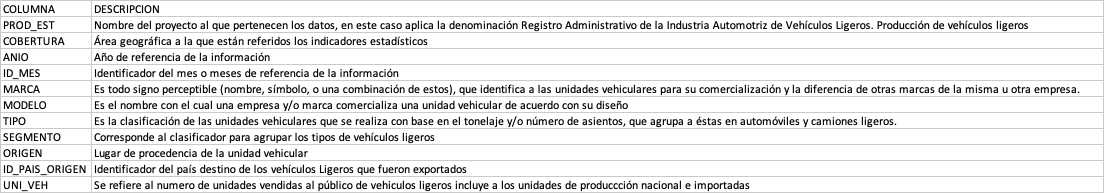

In [5]:
car_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5547 entries, 0 to 5546
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PROD_EST          5547 non-null   object
 1   COBERTURA         5547 non-null   object
 2   ANIO              5547 non-null   int64 
 3   ID_MES            5547 non-null   int64 
 4   MARCA             5547 non-null   object
 5   MODELO            5547 non-null   object
 6   TIPO              5547 non-null   object
 7   SEGMENTO          5547 non-null   object
 8   ORIGEN            5547 non-null   object
 9   ID_PAIS_ORIGEN    5547 non-null   int64 
 10  UNI_VEH           5547 non-null   int64 
 11  DESC_PAIS_ORIGEN  5547 non-null   object
dtypes: int64(4), object(8)
memory usage: 563.4+ KB


<AxesSubplot:>

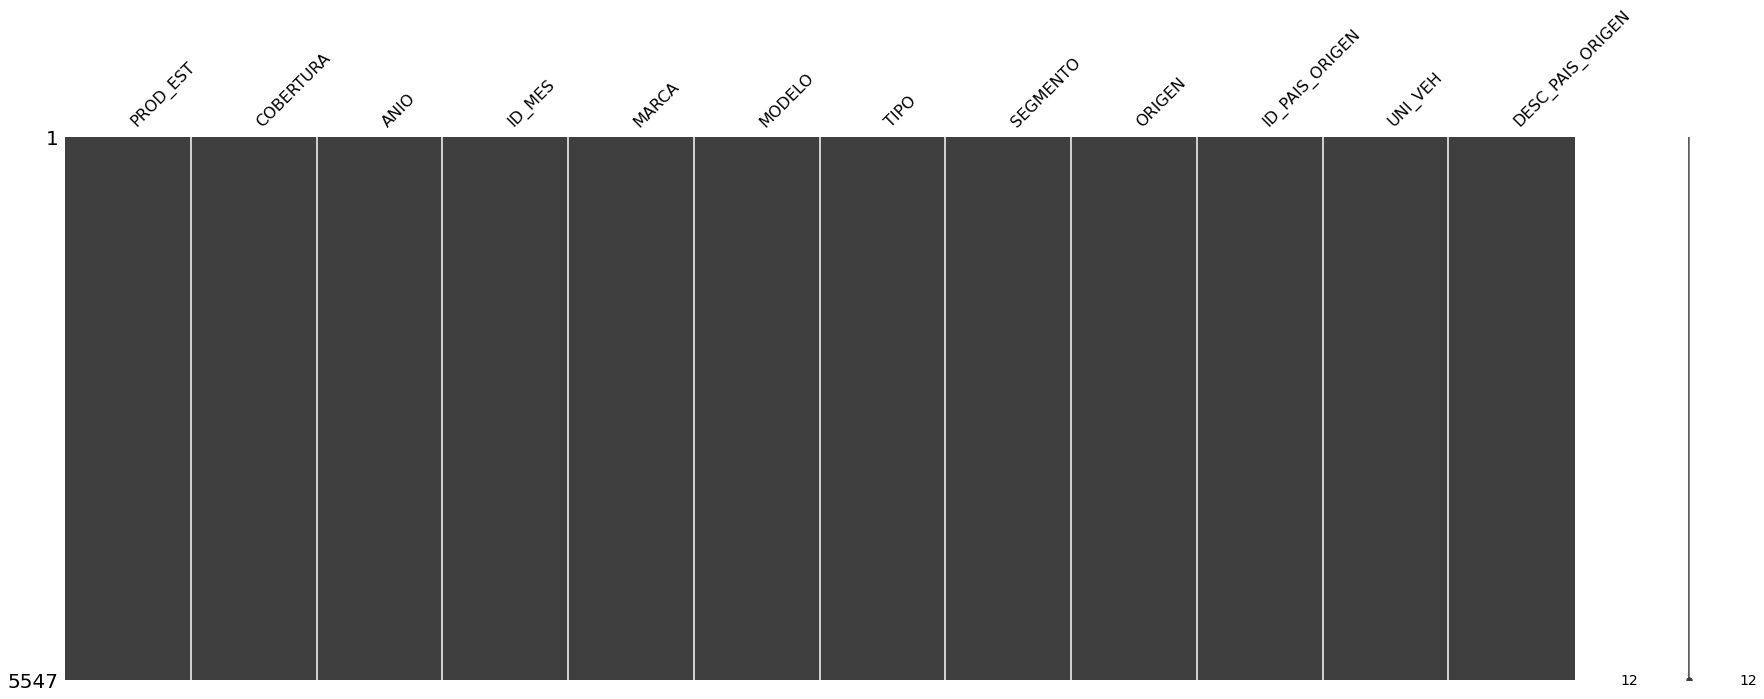

In [6]:
msno.matrix(car_data_new, figsize = (30,10))

This data provides a highly reliable information since there are not missing values

Text(0.5, 1.0, 'Countries where Mexico send the most cars in the world')

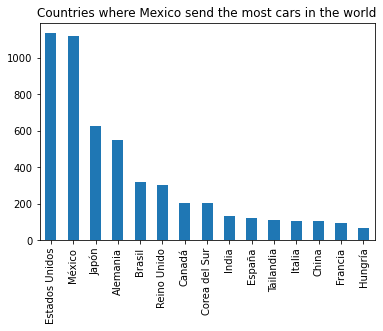

In [7]:
top_ten = car_data_new['DESC_PAIS_ORIGEN'].value_counts()
top_ten = top_ten.head(15)
top_ten.plot(kind='bar')
plt.title('Countries where Mexico send the most cars in the world')

In [8]:
india = (car_data_new['DESC_PAIS_ORIGEN'] == 'Reino Unido')
india

0       False
1       False
2       False
3       False
4       False
        ...  
5542    False
5543    False
5544    False
5545    False
5546    False
Name: DESC_PAIS_ORIGEN, Length: 5547, dtype: bool

In [9]:
car_data_new.loc[india]
car_data_new_india = car_data_new.loc[india]
car_data_new_india

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID_PAIS_ORIGEN,UNI_VEH,DESC_PAIS_ORIGEN
3633,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Bentley,Bentayga,Automóviles,De Lujo,IMPORTADO,181,0,Reino Unido
3634,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Bentley,Continental GT,Automóviles,De Lujo,IMPORTADO,181,0,Reino Unido
3635,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Bentley,Continental GT Speed Black Edition,Automóviles,De Lujo,IMPORTADO,181,0,Reino Unido
3636,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Bentley,Continental GT Speed Convertible,Automóviles,De Lujo,IMPORTADO,181,0,Reino Unido
3637,Registro Administrativo de la Industria Automo...,Nacional,2020,1,Bentley,Continental GT V8 S,Automóviles,De Lujo,IMPORTADO,181,0,Reino Unido
...,...,...,...,...,...,...,...,...,...,...,...,...
3932,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Mini,MINI CLUBMAN,Automóviles,De Lujo,IMPORTADO,181,8,Reino Unido
3933,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Mini,MINI CONVERTIBLE,Automóviles,De Lujo,IMPORTADO,181,8,Reino Unido
3934,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Mini,MINI COUNTRYMAN,Camiones ligeros,SUV's,IMPORTADO,181,70,Reino Unido
3935,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Mini,MINI 3 PTAS,Automóviles,De Lujo,IMPORTADO,181,192,Reino Unido


<AxesSubplot:>

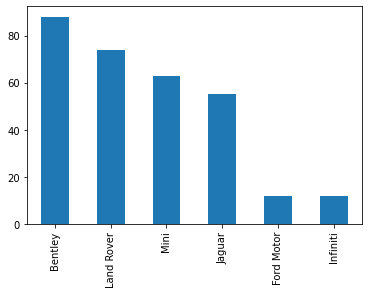

In [10]:
most_exp_car_at_india = car_data_new_india['MARCA'].value_counts()
most_exp_car_at_india.plot(kind='bar')

In [13]:
def most_exported_car(country):
    data = car_data_new
    columns = (car_data_new['DESC_PAIS_ORIGEN'])
    for i in columns:
        data.loc[i]
        data= data.loc[i]
    
    return data
    